# Data Exploration


In [34]:
import pandas as pd
import numpy as np

# Chicago Crime Dataset Analysis

## Dataset Overview

This notebook explores the Chicago Crime Dataset, which contains reported incidents of crime in the city of Chicago. The data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.

## Data Dictionary

The dataset contains 22 columns with the following information:

| Column Name              | Description                                                                               | Data Type          |
| ------------------------ | ----------------------------------------------------------------------------------------- | ------------------ |
| **ID**                   | Unique identifier for the record                                                          | Number             |
| **Case Number**          | The Chicago Police Department RD Number (Records Division Number), unique to the incident | Text               |
| **Date**                 | Date when the incident occurred (sometimes an estimate)                                   | Floating Timestamp |
| **Block**                | Partially redacted address where the incident occurred                                    | Text               |
| **IUCR**                 | Illinois Uniform Crime Reporting code linked to Primary Type and Description              | Text               |
| **Primary Type**         | Primary description of the IUCR code                                                      | Text               |
| **Description**          | Secondary description of the IUCR code (subcategory)                                      | Text               |
| **Location Description** | Description of the location where the incident occurred                                   | Text               |
| **Arrest**               | Indicates whether an arrest was made                                                      | Checkbox           |
| **Domestic**             | Indicates whether the incident was domestic-related                                       | Checkbox           |
| **Beat**                 | The police beat where the incident occurred                                               | Text               |
| **District**             | The police district where the incident occurred                                           | Text               |
| **Ward**                 | The ward (City Council district) where the incident occurred                              | Number             |
| **Community Area**       | The community area where the incident occurred (Chicago has 77 areas)                     | Text               |
| **FBI Code**             | Crime classification based on FBI's National Incident-Based Reporting System              | Text               |
| **X Coordinate**         | X coordinate in State Plane Illinois East NAD 1983 projection                             | Number             |
| **Y Coordinate**         | Y coordinate in State Plane Illinois East NAD 1983 projection                             | Number             |
| **Year**                 | Year the incident occurred                                                                | Number             |
| **Updated On**           | Date and time the record was last updated                                                 | Floating Timestamp |
| **Latitude**             | Latitude of the incident location (partially redacted)                                    | Number             |
| **Longitude**            | Longitude of the incident location (partially redacted)                                   | Number             |
| **Location**             | Location formatted for geographic operations                                              | Location           |

## Important Notes:

- Location data (coordinates, latitude/longitude) is shifted from the actual location for privacy but remains on the same block
- A **Beat** is the smallest police geographic area with a dedicated police car
- Three to five beats make up a police sector
- Three sectors make up a police district
- Chicago has 22 police districts and 77 community areas
- The IUCR (Illinois Uniform Crime Reporting) codes provide standardized categories for crime types

## Analysis Goals

In this notebook, we'll explore:

1. Crime patterns across different areas of Chicago
2. Temporal trends in crime rates
3. Relationships between crime types and locations
4. Predictive modeling to identify factors associated with different crime outcomes


In [35]:
data_path = "data/"
df = pd.read_csv(f"{data_path}classification_data.csv")

In [36]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,IsWeekDay,Isweekend,TimeCategory,Night,Morning,Afternoon,Evening,Season,location_name,location_id
0,11399618,JB374621,2017-12-01 00:00:00,018XX W JACKSON BLVD,1755,OFFENSE INVOLVING CHILDREN,CHILD ABANDONMENT,SIDEWALK,False,True,...,True,False,Night,True,False,False,False,Fall,Highway/Road/Alley/Street/Sidewalk,25
1,12602782,JF125560,2017-12-01 00:00:00,032XX N KENNETH AVE,5001,OTHER OFFENSE,OTHER CRIME INVOLVING PROPERTY,STREET,False,False,...,True,False,Night,True,False,False,False,Fall,Highway/Road/Alley/Street/Sidewalk,25
2,11181204,JA554115,2017-12-01 00:00:00,008XX N KEDZIE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,True,False,Night,True,False,False,False,Fall,Bank/Savings and Loan,7
3,11501497,JB508286,2017-12-01 00:00:00,028XX N LARAMIE AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,...,True,False,Night,True,False,False,False,Fall,Residence/Home,35
4,11245184,JB171250,2017-12-01 00:00:00,031XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,True,False,Night,True,False,False,False,Fall,Residence/Home,35


In [37]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day,Hour,WeekDay,location_id
count,1.733685e+06,1.733685e+06,1.733684e+06,1.733633e+06,1.733681e+06,1.707367e+06,1.707367e+06,1.733685e+06,1.707367e+06,1.707367e+06,1.733685e+06,1.733685e+06,1.733685e+06,1.733685e+06,1.733685e+06
mean,1.239423e+07,1.149138e+03,1.126222e+01,2.324046e+01,3.658557e+01,1.165153e+06,1.886638e+06,2.020948e+03,4.184452e+01,-8.766945e+01,6.693688e+00,1.560181e+01,1.268868e+01,3.013599e+00,3.466648e+01
std,9.819651e+05,7.024350e+02,7.019000e+00,1.398257e+01,2.153987e+01,1.636514e+04,3.172542e+04,2.096689e+00,8.725035e-02,5.954042e-02,3.396325e+00,8.880463e+00,6.769073e+00,1.999450e+00,2.089560e+01
min,2.371600e+04,1.110000e+02,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.017000e+03,3.661945e+01,-9.168657e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.176787e+07,6.110000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153585e+06,1.859217e+06,2.019000e+03,4.176897e+01,-8.771150e+01,4.000000e+00,8.000000e+00,8.000000e+00,1.000000e+00,2.500000e+01
50%,1.242471e+07,1.031000e+03,1.000000e+01,2.400000e+01,3.200000e+01,1.166991e+06,1.893234e+06,2.021000e+03,4.186284e+01,-8.766277e+01,7.000000e+00,1.600000e+01,1.400000e+01,3.000000e+00,3.500000e+01
75%,1.307514e+07,1.723000e+03,1.700000e+01,3.400000e+01,5.300000e+01,1.176668e+06,1.909518e+06,2.023000e+03,4.190734e+01,-8.762730e+01,1.000000e+01,2.300000e+01,1.800000e+01,5.000000e+00,3.500000e+01
max,1.375645e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951535e+06,2.024000e+03,4.202267e+01,-8.752453e+01,1.200000e+01,3.100000e+01,2.300000e+01,6.000000e+00,9.900000e+01


In [38]:
nunique_df = pd.DataFrame(
    {
        "Column": df.columns,
        "Unique Values": df.nunique().values,
        "Type": df.dtypes.values,
        "Is Null": df.isnull().sum().values,
    }
)
nunique_df.sort_values("Unique Values", ascending=False)

,Column,Unique Values,Type,Is Null
0,ID,1733685,int64,0
1,Case Number,1733477,object,0
2,Date,840699,object,0
21,Location,386412,object,26318
19,Latitude,386171,float64,26318
20,Longitude,386037,float64,26318
16,Y Coordinate,113783,float64,26318
15,X Coordinate,68769,float64,26318
3,Block,37834,object,0
18,Updated On,5067,object,0


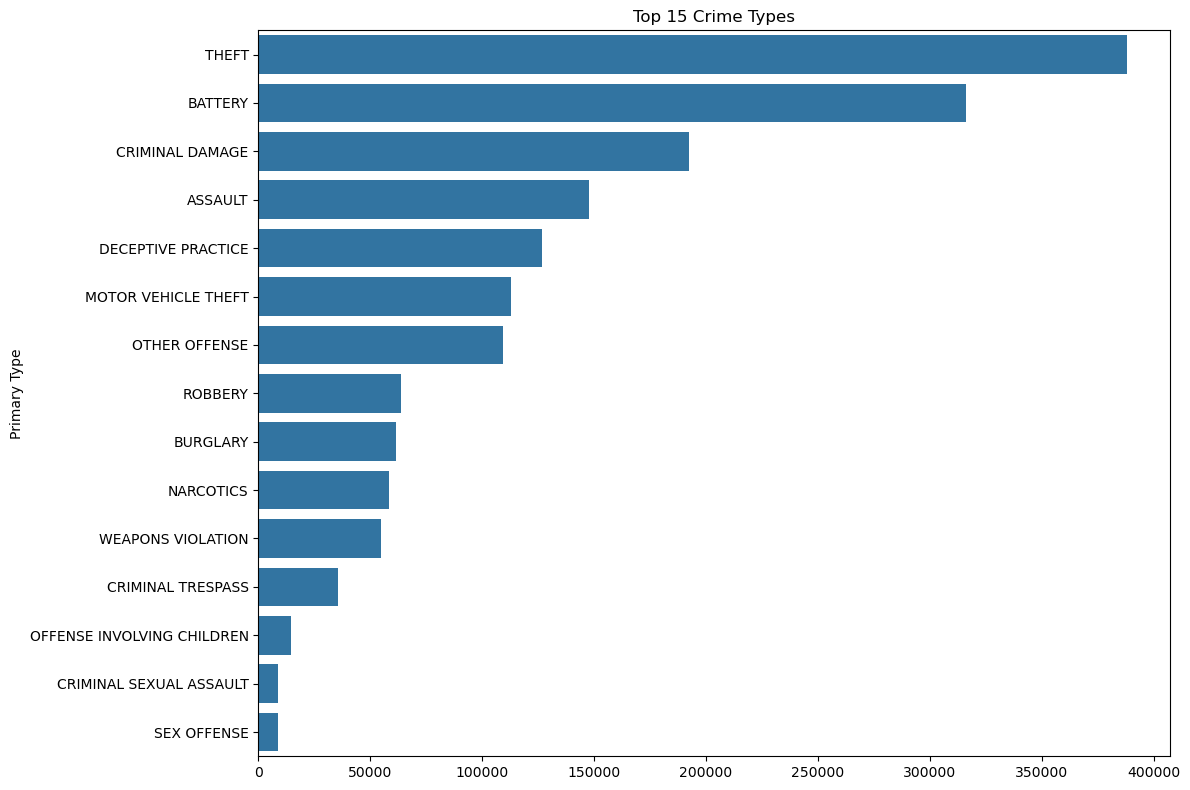

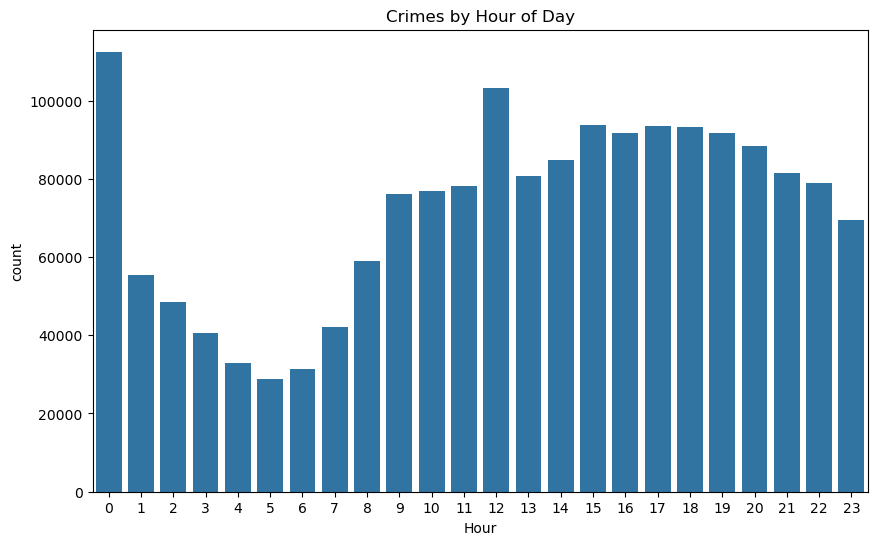

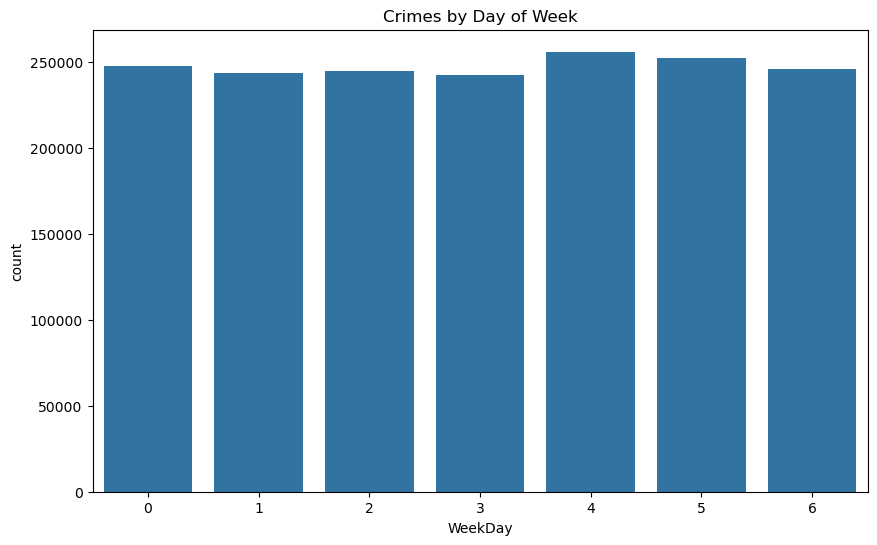

In [39]:
# Visualize crime distribution by type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
crime_counts = df["Primary Type"].value_counts().head(15)
sns.barplot(x=crime_counts.values, y=crime_counts.index)
plt.title("Top 15 Crime Types")
plt.tight_layout()
plt.show()

# Time-based patterns
plt.figure(figsize=(10, 6))
sns.countplot(x="Hour", data=df)
plt.title("Crimes by Hour of Day")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x="WeekDay", data=df)
plt.title("Crimes by Day of Week")
plt.show()

## Arrest Rates by Crime Type


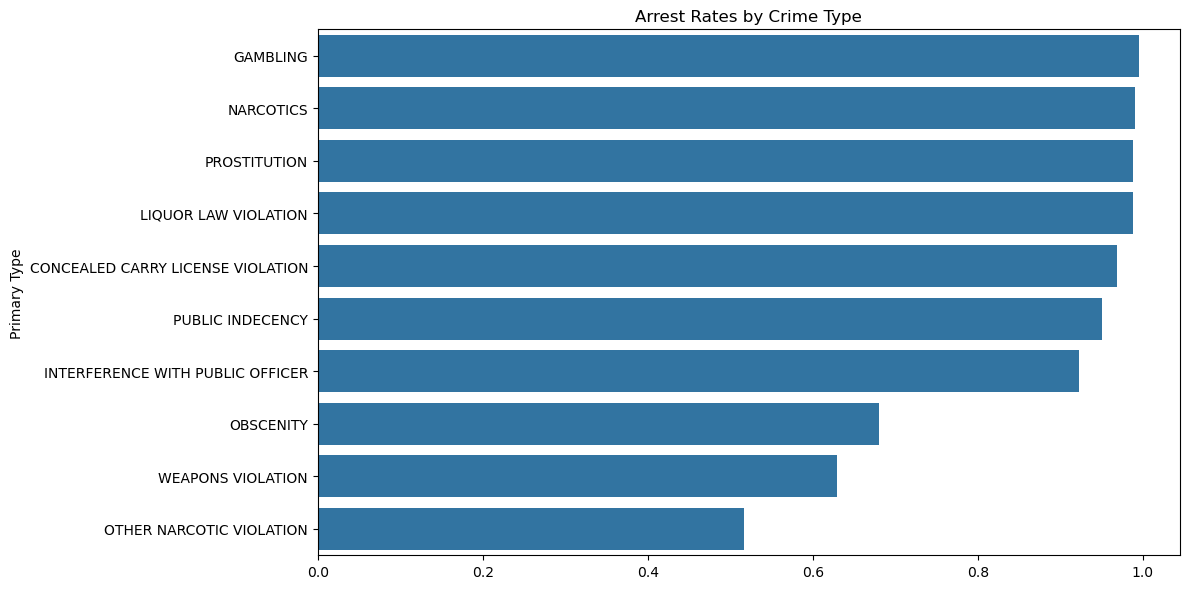

In [ ]:
plt.figure(figsize=(12, 6))
arrest_rates = (
    df.groupby("Primary Type")["Arrest"].mean().sort_values(ascending=False).head(10)
)
sns.barplot(x=arrest_rates.values, y=arrest_rates.index)
plt.title("Arrest Rates by Crime Type")
plt.tight_layout()
plt.show()

# Arrest Rates by Location


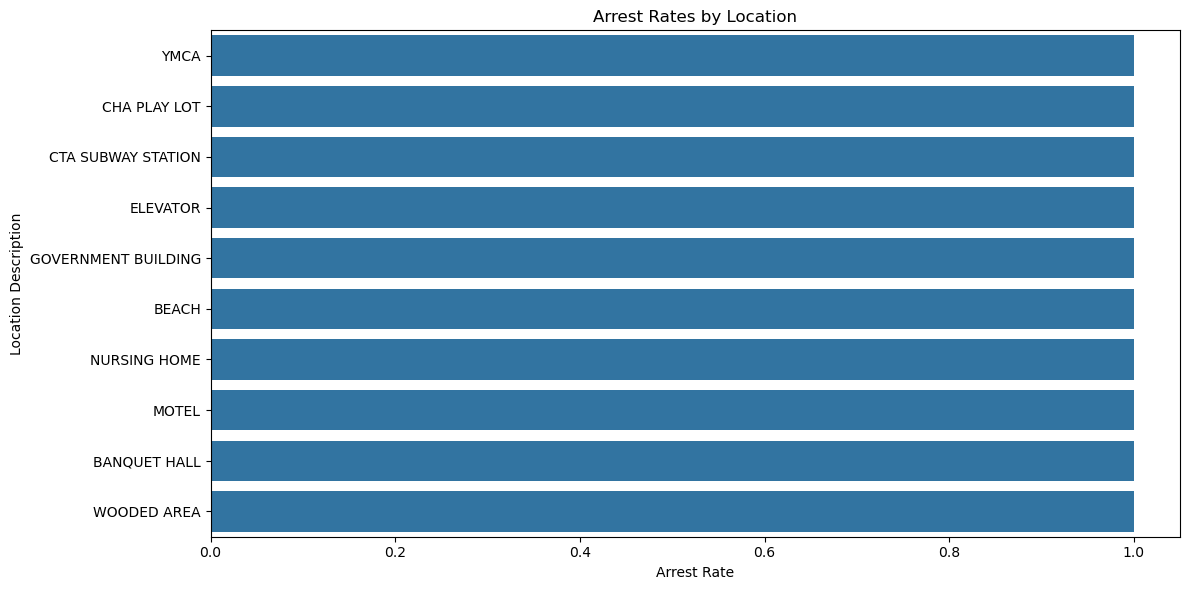

In [41]:
plt.figure(figsize=(12, 6))
location_arrest = (
    df.groupby("Location Description")["Arrest"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
sns.barplot(x=location_arrest.values, y=location_arrest.index)
plt.title("Arrest Rates by Location")
plt.xlabel("Arrest Rate")
plt.tight_layout()
plt.show()

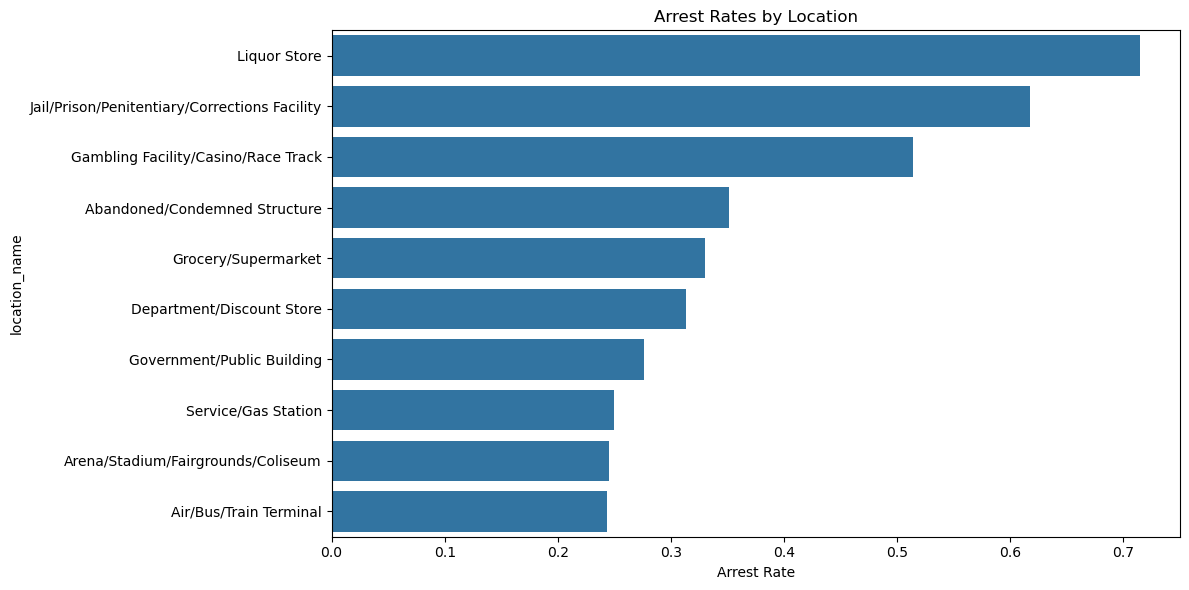

In [ ]:
plt.figure(figsize=(12, 6))
location_arrest = (
    df.groupby("location_name")["Arrest"].mean().sort_values(ascending=False).head(10)
)
sns.barplot(x=location_arrest.values, y=location_arrest.index)
plt.title("Arrest Rates by Location")
plt.xlabel("Arrest Rate")
plt.tight_layout()
plt.show()

## Crime Type by Top Location Groups


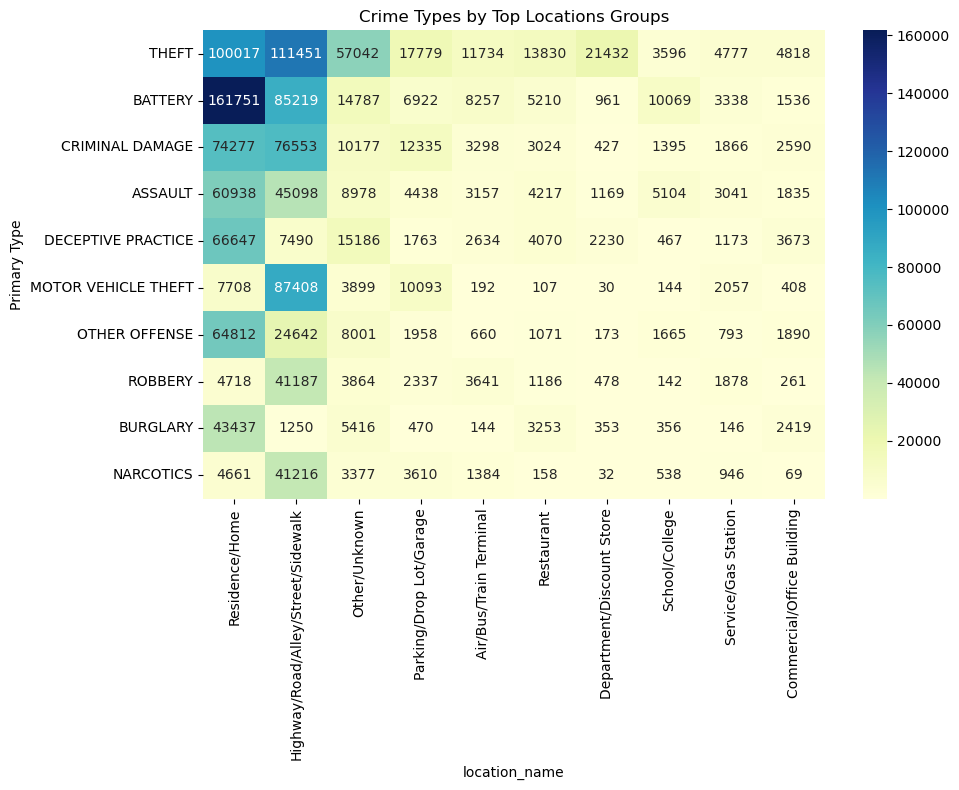

In [43]:
plt.figure(figsize=(10, 8))
top_crimes = df["Primary Type"].value_counts().head(10).index
top_locations = df["location_name"].value_counts().head(10).index
crime_by_location = pd.crosstab(df["Primary Type"], df["location_name"])[
    top_locations
].loc[top_crimes]
sns.heatmap(crime_by_location, annot=True, cmap="YlGnBu", fmt="g")
plt.title("Crime Types by Top Locations Groups")
plt.tight_layout()
plt.show()

## Crime Counts By Season


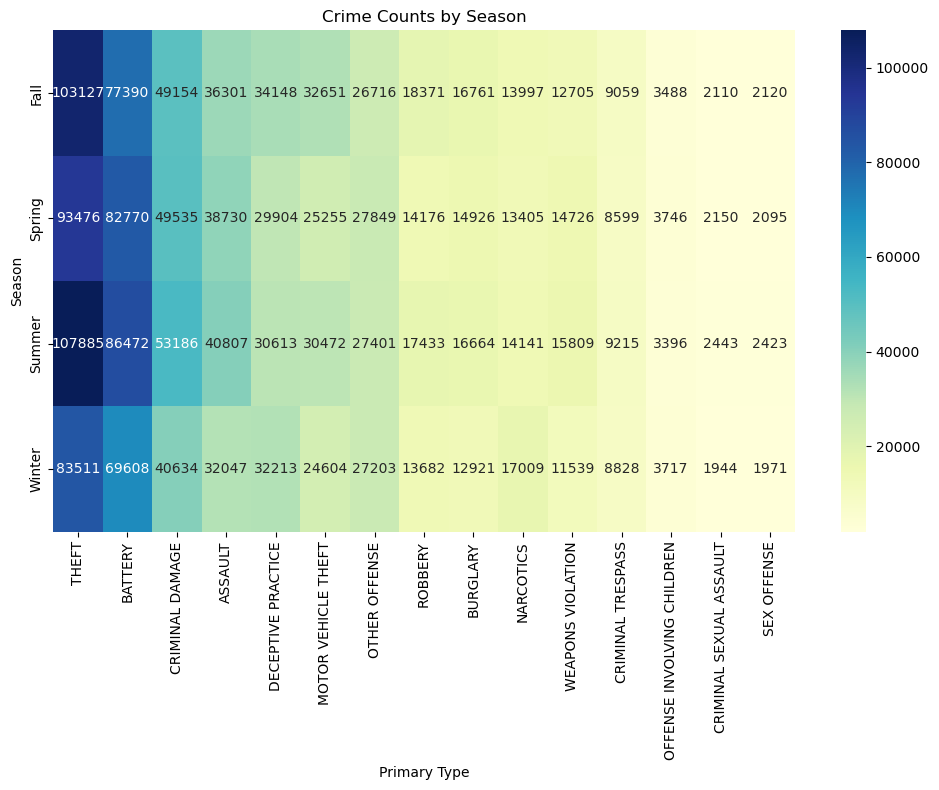

In [44]:
plt.figure(figsize=(10, 8))
season_crime = pd.crosstab(df["Season"], df["Primary Type"])
top_crimes = df["Primary Type"].value_counts().head(15).index
season_crime = season_crime[top_crimes]
sns.heatmap(season_crime, annot=True, cmap="YlGnBu", fmt="g")
plt.title("Crime Counts by Season")
plt.tight_layout()
plt.show()

## Correlation Matrix


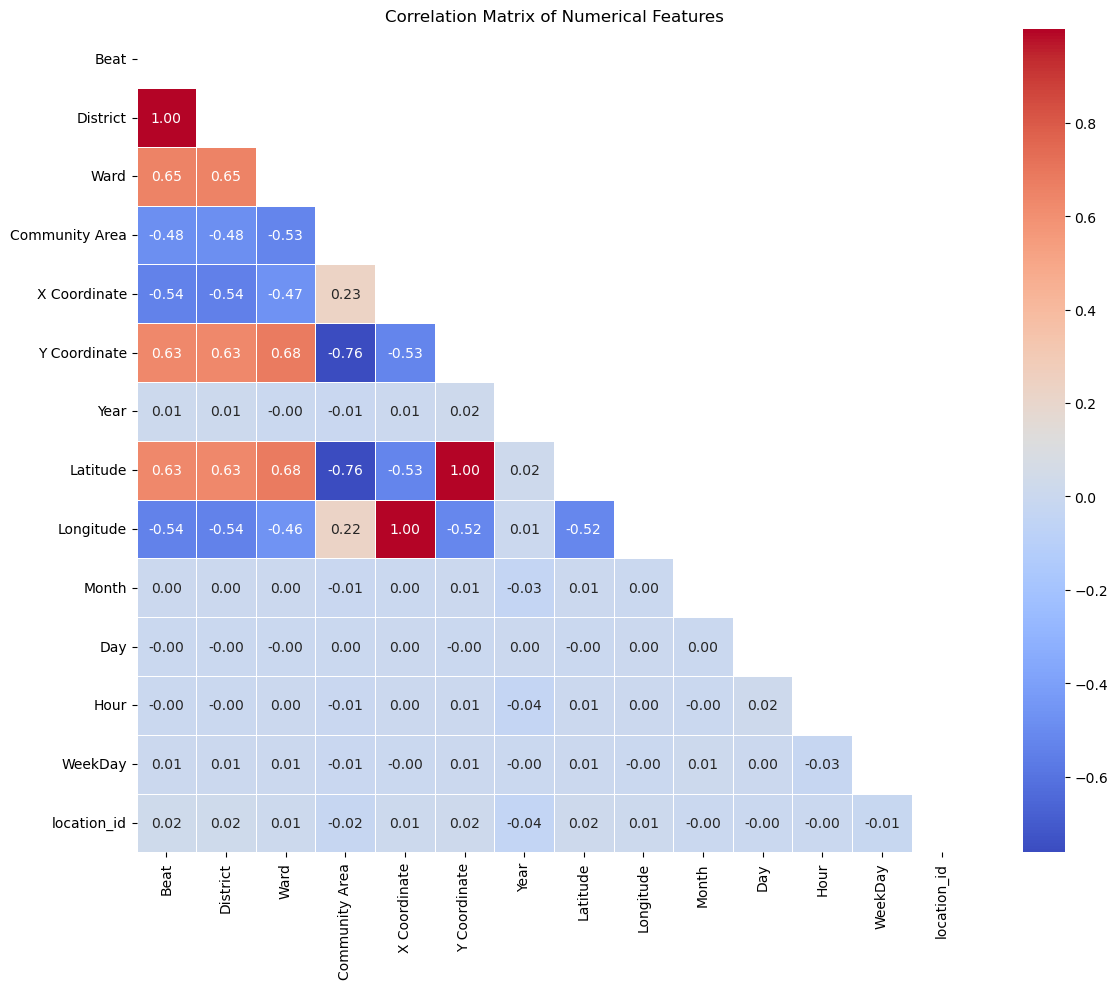

In [45]:
plt.figure(figsize=(12, 10))
numerical_cols = df.select_dtypes(include=["number"]).columns.drop(["ID"])
corr_matrix = df[numerical_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix, mask=mask, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f"
)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

## PCA


In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

['location_name']
(1733685, 31)


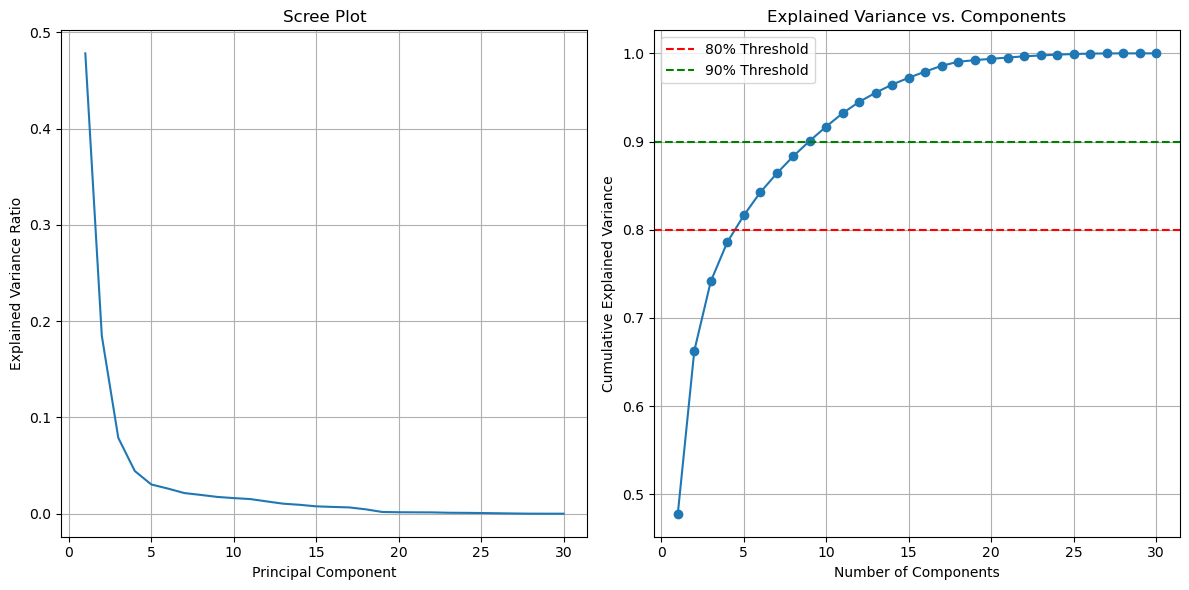

In [ ]:
# Create scree plot for PCA component selection
plt.figure(figsize=(12, 6))
# First encode categorical variables
categorical_cols = [
    "location_name",
    # "TimeCategory",
    # "Season",
]
print(categorical_cols)
encoder = OneHotEncoder(drop="first")
encoded_cats = encoder.fit_transform(df[categorical_cols])
print(encoded_cats.shape)
# Then perform PCA
pca = PCA(n_components=encoded_cats.shape[1] - 1)
pca_result = pca.fit_transform(encoded_cats)
# Plot the explained variance of each individual component
plt.subplot(1, 2, 1)
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_
)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)

# Plot the cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    np.cumsum(pca.explained_variance_ratio_),
    marker="o",
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Components")
plt.axhline(y=0.8, color="r", linestyle="--", label="80% Threshold")
plt.axhline(y=0.9, color="g", linestyle="--", label="90% Threshold")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()